In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm,tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer,scale,LabelEncoder, OneHotEncoder
from gensim.models import Word2Vec
from sklearn.metrics import r2_score,mean_squared_error, explained_variance_score, accuracy_score
from scipy import sparse
from scipy.sparse import hstack,vstack
import math
# Deep Learning 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout, Activation
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

C:\Users\Dell\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
def plot_corr(df,size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    b=ax.matshow(corr)
    fig.colorbar(b)
    ax.grid(which='minor',color='w', linestyle='-', linewidth=2)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

In [15]:
df1 = pd.read_csv('Claims.csv',encoding='mac_roman', low_memory=False)
columns_to_be_dropped =['PLATE','PLATESTATE','EMPLSTATUS','EMPLSTATUSDESC','EMPLSTATUS_NCCI','DOB','DATEOFHIRE','NCCI_NOI','NCCI_SOI','NCCI_SEV','JOBCODE','JOBTITLE','CLASSCODE','CLASSCODE_DESCR','IPHONE','IWORKPHONE','LNAME','LTAXID','LADDR1','LADDR2','LCITY','LSTATE','LZIP','LPHONE','LFAX','DNAME','DTAXID','DADDR1','DADDR2','DCITY','DSTATE','DZIP','DPHONE','DFAX','CLASSCODE','CLASSCODE_DESCR','DATEINITIA','DATERETURN','DATEREPORT','WEEKLYWAGE','DIVTXTCODE','INSUIT','DEFENSECOUNSEL','SUITRECEIVED','APPARENTSERVICEDATE','SUITASSIGNED','STIPDATE','DCTAXID','DCCONTACT','DCADDR1','DCADDR2','DCCITY','DCSTATE','DCZIP','DCPHONE','DCFAX','ISSNUM',
'CLIENTSCLMNO','THIRDNUM','MARITAL','INDRESERVES','MEDRESERVES','EXPRESERVES','TOTALRESERVES','PHP_1st_Deducible_Notice','PHP_AMSLocs','PHP_Baileys_Custom_Location','PHP_Corrigan_Location','PHP_Daryl_Flood_Locs','PHP_Date_of_Expected_Denial','PHP_Date_of_Recovery','PHP_Deductible_Explanation','PHP_Deductible_Verifies?','PHP_Employee_Theft','PHP_Hazen_CC#','PHP_Mysterious_Disappearance','NET_INDEMNITY_RESERVE','NET_EXPENSE_RESERVE','PHP_Order_Number','PHP_Owner_Retained_Salvage_Amount','PHP_Cause_Code','PHP_Ref._to_Carrier_for_Recovery','PHP_Salvage','PHP_TF_Final_Mile_Branch_Code','PHP_TF/Final_Mile_Contractor','PHP_UST_Branch_Code','PHP_Van_Line','PHP_Voluntary_Payment']
df1.drop(columns=columns_to_be_dropped, inplace=True)

In [16]:
def label(df):
    #print(df.isnull().sum())
    df.fillna(0)
    X = df.iloc[:,0:len(df.iloc[0])].values
    for i in range(56):
       # print(i, end='  ')
        print(i)
        labelencoder_X_1 = LabelEncoder()
        X[:, i] = labelencoder_X_1.fit_transform(X[:, i])
        #print(i)
    X=X.astype(np.float)
    d1=pd.DataFrame(X)
    return d1

In [17]:
def fillN(df):
    l=len(df.iloc[0])-1
    for i in range(l):
        #print(i)
        if(df1.isnull().sum()[i]>0):
            t=df.dtypes[i]
            for j in range(len(df)):
                value=df.iloc[j,i]
                
                if(t=='O'):
                    #if(i==14):
                     #   print(value, end=' ')
                    if(type(value)==str):
                        if(value.strip()==''):
                            df.iloc[j,i]='Unknown'
                    elif(math.isnan(value)):
                            df.iloc[j,i]='Unknown'
                    #if(i==14) : print(df.iloc[j,i])
                else:
                    if(math.isnan(value)):
                        df.iloc[j,i]=df.iloc[0:,i].mean()
            #print('\n')
    return df

In [18]:
df1=fillN(df1)

In [19]:
df1=label(df1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


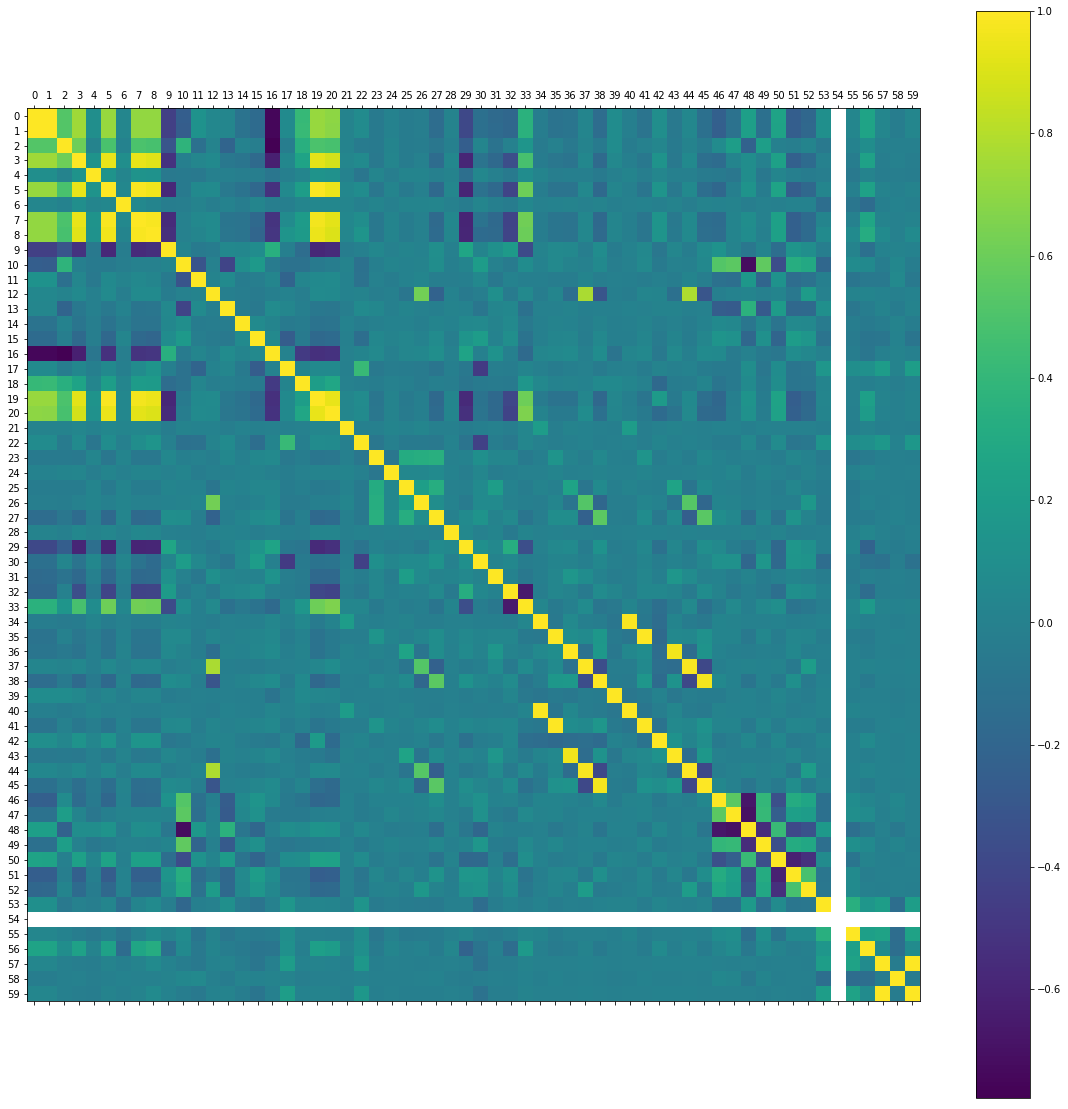

In [20]:
plot_corr(df1,20)

In [21]:
cmap = cmap=sns.diverging_palette(0, 500, as_cmap=True)
corr=df1.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [ ]:
pd.scatter_matrix(df1, figsize=(50, 50))
plt.show()

In [22]:
df1 = pd.read_csv('Claims.csv',encoding='mac_roman', low_memory=False)
columns_to_be_dropped =['PLATE','PLATESTATE','EMPLSTATUS','EMPLSTATUSDESC','EMPLSTATUS_NCCI','DOB','DATEOFHIRE','NCCI_NOI','NCCI_SOI','NCCI_SEV','JOBCODE','JOBTITLE','CLASSCODE','CLASSCODE_DESCR','IPHONE','IWORKPHONE','LNAME','LTAXID','LADDR1','LADDR2','LCITY','LSTATE','LZIP','LPHONE','LFAX','DNAME','DTAXID','DADDR1','DADDR2','DCITY','DSTATE','DZIP','DPHONE','DFAX','CLASSCODE','CLASSCODE_DESCR','DATEINITIA','DATERETURN','DATEREPORT','WEEKLYWAGE','DIVTXTCODE','INSUIT','DEFENSECOUNSEL','SUITRECEIVED','APPARENTSERVICEDATE','SUITASSIGNED','STIPDATE','DCTAXID','DCCONTACT','DCADDR1','DCADDR2','DCCITY','DCSTATE','DCZIP','DCPHONE','DCFAX','ISSNUM',
'CLIENTSCLMNO','THIRDNUM','MARITAL','INDRESERVES','MEDRESERVES','EXPRESERVES','TOTALRESERVES','PHP_1st_Deducible_Notice','PHP_AMSLocs','PHP_Baileys_Custom_Location','PHP_Corrigan_Location','PHP_Daryl_Flood_Locs','PHP_Date_of_Expected_Denial','PHP_Date_of_Recovery','PHP_Deductible_Explanation','PHP_Deductible_Verifies?','PHP_Employee_Theft','PHP_Hazen_CC#','PHP_Mysterious_Disappearance','NET_INDEMNITY_RESERVE','NET_EXPENSE_RESERVE','PHP_Order_Number','PHP_Owner_Retained_Salvage_Amount','PHP_Cause_Code','PHP_Ref._to_Carrier_for_Recovery','PHP_Salvage','PHP_TF_Final_Mile_Branch_Code','PHP_TF/Final_Mile_Contractor','PHP_UST_Branch_Code','PHP_Van_Line','PHP_Voluntary_Payment']
df1.drop(columns=columns_to_be_dropped, inplace=True)
for i in range(len(df1.columns.values)):
    print(i, df1.columns.values[i])

0 CLMNO
1 OCCURRENCE
2 CLNTNO
3 CARRIERCLMNO
4 ADJUSTER
5 LOSSDATE
6 STATUS
7 OPENDATE
8 CLOSEDATE
9 REOPENDATE
10 LOB
11 COVERAGE
12 STATE
13 DESCR
14 DESCR2
15 INJURIES
16 CAUSE
17 ANATOMY
18 IPOLNO
19 IEFFDT
20 IEXPDT
21 CLAIMANT
22 CSSNUM
23 CADDR1
24 CADDR2
25 CCITY
26 CSTATE
27 CZIP
28 CPHONE
29 CWORKPHONE
30 CGENDER
31 LOCDESC
32 LOC
33 LOCTXTCODE
34 LOCNM
35 LOCNM2
36 LOCCITY
37 LOCSTATE
38 LOCZIP
39 DIVNUM
40 INAME
41 IADDR1
42 IADDR2
43 ICITY
44 ISTATE
45 IZIP
46 VINNO
47 AUTOMAKE
48 VEHYEAR
49 DRIVERNAME
50 DRIVERAGE
51 LICENSENO
52 LICSTATE
53 INDPAID
54 MEDPAID
55 EXPPAID
56 YORKPAID
57 TOTALPAID
58 RECOVERIES
59 INCURRED
